<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/Smooth_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Smooth Curves...

`plt.plot()` $\times$ `sns.lineplot()` e **Intervalos de Confiança**.

<br>



---



# Basic imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# **CASE: fmri**



In [ ]:
df = sns.load_dataset('fmri')
df.head()


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


## `plt.plot() I`

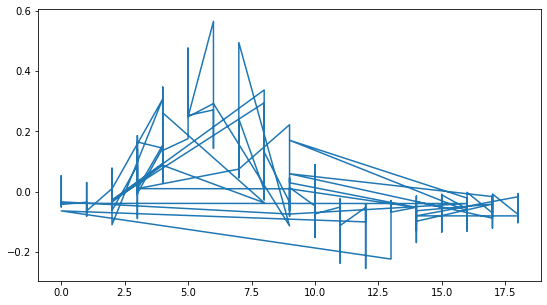

In [ ]:
fig = plt.figure(figsize=(9,5))

mask = (df.event == 'stim') & (df.region == 'parietal')
x = df[mask].timepoint
y = df[mask].signal

plt.plot(x,y)
plt.show()

## `plt.plot() II`

In [ ]:
df = df.sort_values('timepoint')

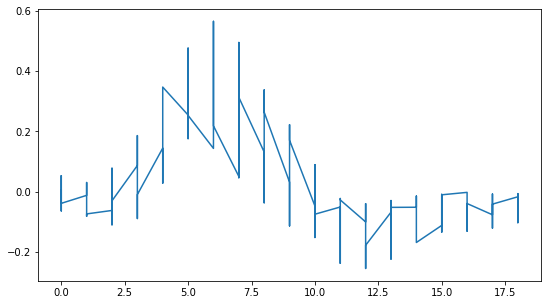

In [ ]:
fig = plt.figure(figsize=(9,5))

mask = (df.event == 'stim') & (df.region == 'parietal')
x = df[mask].timepoint
y = df[mask].signal

plt.plot(x,y)
plt.show()

## `plt.scatter()`

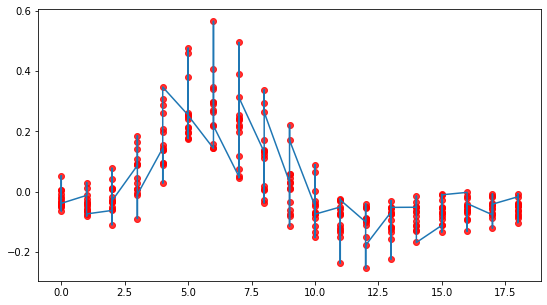

In [ ]:
fig = plt.figure(figsize=(9,5))

mask = (df.event == 'stim') & (df.region == 'parietal')
x = df[mask].timepoint
y = df[mask].signal

plt.plot(x,y)
plt.scatter(x,y,color='r',alpha=0.8)
plt.show()

## Intervalo de Confiança

Vamos fazer um `plot`do valor médio e incluir um Intervalo de Confiança.  

Em probabilidade e estatística , o ponto percentil $97.5$ da distribuição normal padrão é um número comumente usado para cálculos estatísticos. O valor aproximado desse número é $1.96$, o que significa que $95$% da área sob uma curva normal está dentro de aproximadamente $1.96$ desvios padrão da média. Por causa do teorema do limite central , esse número é usado na construção de intervalos de confiança aproximados de $95$%. O uso de $95$% é uma convenção arbitrária, mas comum de ser aplicado em dados de ciências, medicina, economia, dados sociais etc. embora outros percentuais, como $90$%, $99$% possam ser também usados.

![imagem](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/NormalDist1.96.png/250px-NormalDist1.96.png)

Se $X$ tem uma distribuição normal, $X$ ~ $N(0,1)$,

$$\mathrm {P} (X>1.96)\approx 0.025$$

$$\mathrm {P} (X<1.96)\approx 0.975$$

que, sendo simétrica,

$$\mathrm {P} (-1.96 < X < 1.96)\approx 0.975$$

### Valor Médio

In [ ]:
mask = (df.event == 'stim') & (df.region == 'parietal')
df_grouped = df[['timepoint', 'signal']].groupby(['timepoint'])['signal'].agg(['mean', 'std', 'count'])

df_grouped = df_grouped.reset_index()
df_grouped.head()

,timepoint,mean,std,count
0,0,-0.016662,0.028326,56
1,1,-0.025002,0.030641,56
2,2,-0.012873,0.035440,56
3,3,0.034446,0.058260,56
4,4,0.098194,0.092838,56


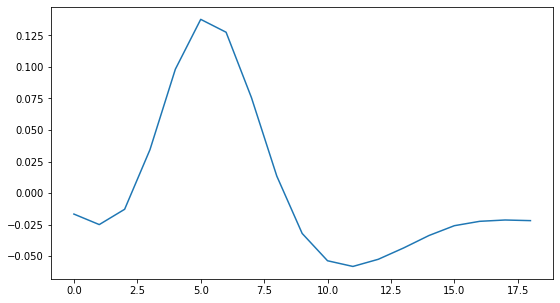

In [ ]:
fig = plt.figure(figsize=(9,5))

x = df_grouped.timepoint
y = df_grouped['mean']

plt.plot(x,y)
plt.show()

### Intervalo de Confiança

In [ ]:
# Calculate CI Confidence Interval 95%
df_grouped['ci'] = 1.96 * df_grouped['std'] / np.sqrt(df_grouped['count'])
df_grouped['ci_lower'] = df_grouped['mean'] - df_grouped['ci']
df_grouped['ci_upper'] = df_grouped['mean'] + df_grouped['ci']
df_grouped.head()

,timepoint,mean,std,count,ci,ci_lower,ci_upper
0,0,-0.016662,0.028326,56,0.007419,-0.024081,-0.009243
1,1,-0.025002,0.030641,56,0.008025,-0.033027,-0.016976
2,2,-0.012873,0.035440,56,0.009282,-0.022155,-0.003591
3,3,0.034446,0.058260,56,0.015259,0.019187,0.049705
4,4,0.098194,0.092838,56,0.024316,0.073878,0.122510


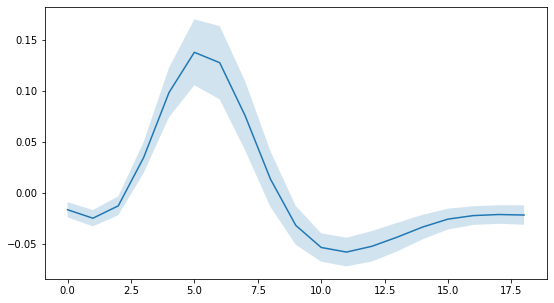

In [ ]:
fig = plt.figure(figsize=(9,5))

x = df_grouped.timepoint
y = df_grouped['mean']

plt.plot(x,y)
plt.fill_between(x,df_grouped['ci_lower'],df_grouped['ci_upper'],alpha=.20)
plt.show()

## `sns.lineplot()`

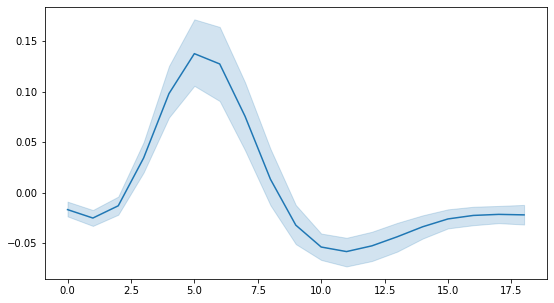

In [ ]:
fig = plt.figure(figsize=(9,5))

x = df.timepoint
y = df.signal

sns.lineplot(x=x,y=y)

plt.xlabel(None)
plt.ylabel(None)
plt.show()